## Netflix duomenu analize

Siame darbe bus tikrinamos keleta hipoteziu:
1) Netflixas turi daugiaus erialu negu filmu
2) Pora metu iki covid-19 pandemijos buvo isleista daugiau filmu /serialu negu pandemijos metu. Imam 2017-2019( laikas iki pandemijos) 2019-2021 ( laikas covid-19 pandemijos metu)
3) Netflixe yra daugiausiai US ir UK prodactiona, palyginus su kitom salim.

In [67]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\resto\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
netflix_df=pd.read_csv('netflix_titles.csv', index_col=0)
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [70]:
netflix_df.info

<bound method DataFrame.info of             type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
...          ...                    ...              ...   
s8803      Movie                 Zodiac    David Fincher   
s8804    TV Show            Zombie Dumb              NaN   
s8805      Movie             Zombieland  Ruben Fleischer   
s8806      Movie                   Zoom     Peter Hewitt   
s8807      Movie                 Zubaan      Mozez Singh   

                                                      cast        country  \
show_id                                                                     
s1                               

# Duomenu filtravimas

 Ispradziu isvalom duomenys. Tam naikinam dublikatus ir duomenys, kurie uzpildyti nepilnai, nes jie yra nenaudingi palyginimams.

In [71]:
netflix_df_cleaned=netflix_df.drop_duplicates()
netflix_df_cleaned
netflix_df_cleaned=netflix_df_cleaned.dropna(how='any',subset=['type','director','country','release_year','duration','listed_in'])
netflix_df_cleaned

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


# Indeksavimas

Pridedam paprasta indeksa, tam kad butu aiskiau suvokti kas kur randasi

In [72]:
netflix_df_2=netflix_df_cleaned.reset_index()
netflix_df_2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
5743,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5744,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5745,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5746,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Duomenu analizavimas

Tikrinam pirma hipoteze- netflixas turi daugiau serialu negu filmu. 

Tam kad patvirtinti arba paneigti reikia isskirti is bendru duomenu kiek yra filmu bei serialu , prielaida- kadangi duomenys buvo isvalyti ir atrinkti tik pilnai supildyti duomenys.

In [73]:
netflix_df_2[['type','duration']]

,type,duration
0,Movie,90 min
1,Movie,125 min
2,TV Show,9 Seasons
3,Movie,104 min
4,Movie,127 min
...,...,...
5743,Movie,96 min
5744,Movie,158 min
5745,Movie,88 min
5746,Movie,88 min


In [74]:
netflix_df_2['type'].unique()
netflix_df_2['type'].value_counts()

Movie      5559
TV Show     189
Name: type, dtype: int64

Pirma hipoteze nepasitvirtino. Filmu visgi yra daugiau negu serialu, nors jei ziureti pagal seriju kieki seriale, galbut butu galima gincytis ta tema. Taciau tokiu duomenu siuo metu neturim, tad hipoteze nepasitvirtino

 Tikrinam antra hipoteze
 Kiek filmu ir serialu buvo isleista atitinkamais metais. Hipoteze kad karantino metu buvo islaista maziau filmu negu keliais metais iki jo.

In [75]:
netflix_movie=netflix_df_2[netflix_df_2['type']=='Movie']
netflix_movie
# pridedam stulpelim kur bus paskaiciuota kiek filmu buvo isleista atitinkamais metais, tam kad duomenys galetumem atvaizduoti grafike
netflix_movie['count']=1
netflix_movie

C:\Users\resto\AppData\Local\Temp\ipykernel_30780\237588144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie['count']=1


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1
5,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,1
5744,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1
5745,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1
5746,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1


In [101]:
netflix_TVshow_1=netflix_df_2[netflix_df_2['type']=='TV Show']
# pridedam stulpelim kur bus paskaiciuota kiek serialu buvo isleista atitinkamais metais, tam kad duomenys galetumem atvaizduoti grafike
netflix_TVshow_1['count']=1
netflix_TVshow_1

C:\Users\resto\AppData\Local\Temp\ipykernel_30780\4071270885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_TVshow_1['count']=1


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,1
96,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,1
125,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i...",1
126,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...,1
138,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,s8236,TV Show,The Calling,Bumpy,NaN,India,"April 1, 2019",2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,1
5337,s8294,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,"March 31, 2017",2012,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Richie Beckett is an aging Brighton crime boss...,1
5346,s8303,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...,1
5541,s8550,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns, Lynn Novick",NaN,United States,"June 20, 2018",2017,TV-MA,1 Season,Docuseries,"Ken Burns presents an epic 10-part, 18-hour ch...",1


release_year
2021    161
2012    164
2013    210
2014    248
2015    369
2020    444
2019    542
2016    628
2018    687
2017    713
Name: release_year, dtype: int64


release_year
1963      1
1966      1
1946      1
1947      1
1961      1
       ... 
2020    444
2019    542
2016    628
2018    687
2017    713
Name: release_year, Length: 73, dtype: int64

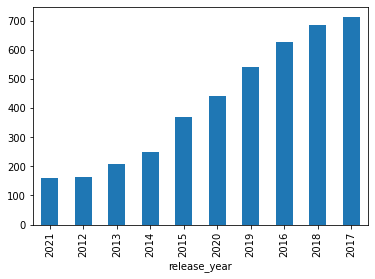

In [77]:
netflix_movie_1=netflix_movie.groupby('release_year')['release_year'].count().sort_values()
print(netflix_movie_1.tail(10))
netflix_movie_1.tail(10).plot.bar()
netflix_movie_1



2017m ir 2018m filmu buvo isleista daugiau negu 2019, 2020 ir 2021 m . Hipoteze pasitvirtino 

release_year
2006     4
2012     5
2014     9
2015    10
2016    12
2018    20
2017    22
2021    24
2019    29
2020    44
Name: release_year, dtype: int64


release_year
1946     1
1990     1
2001     1
2010     1
2011     3
2013     3
2006     4
2012     5
2014     9
2015    10
2016    12
2018    20
2017    22
2021    24
2019    29
2020    44
Name: release_year, dtype: int64

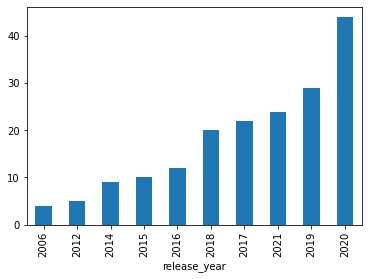

In [102]:
netflix_tv_show=netflix_TVshow_1.groupby('release_year')['release_year'].count().sort_values()
print(netflix_tv_show.tail(10))
netflix_tv_show.tail(10).plot.bar()
netflix_tv_show

2017 ir 2018 m serialu buvo isleista maziau negu 2019, 2020 ir 2021 m . Hipoteze nepasitvirtino.

Bendros isvados- hipoteze pasitvirtino tik is dalies, kadangi filmu buvo maziau , taciau serialu daugiau.


In [109]:
netflix_movie.groupby('country').count()
netflix_df_2['country'].value_counts()


United States                                                  2045
India                                                           890
United Kingdom                                                  212
Canada                                                          119
Spain                                                           106
                                                               ... 
France, Belgium, Luxembourg, Romania, Canada, United States       1
Singapore, Malaysia                                               1
Switzerland                                                       1
Italy, Belgium                                                    1
United Arab Emirates, Jordan                                      1
Name: country, Length: 658, dtype: int64

3 Hipoteze, kad daugiausia filmu yra US ir Uk prodactiono pasitvirtino is dalies. Taip daugiausia filmu ir serialu yra US prodactiono, taciau antroje vietoje yra Indija, kuri smarkiai aplenke UK. ( analizuojam tik tuose duomenys, kur viena salis suteikia visa prodactiono, nesidalindama su kitom salim )

# Duomenu analizavimas pagal reziseriu ( director)

Taip pat idomumo delei buvo nagrinejami reziseriai. 

In [107]:
netflix_df_2['director'].unique()

array(['Kirsten Johnson', 'Haile Gerima', 'Andy Devonshire', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [108]:
netflix_df_2['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Maha Venkatesh             1
Tharun Bhascker            1
Farhan Alam                1
Hayato Date                1
Mozez Singh                1
Name: director, Length: 4286, dtype: int64

Daugiausiai yra sukures tandemas - Raúl Campos, Jan Suter 

In [110]:
netflix_df_2[netflix_df_2['director']=='Raúl Campos, Jan Suter']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
2749,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",1
2764,s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,1
2788,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,1
2812,s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,1
2823,s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,1
2876,s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Lucas Lauriente,Argentina,"April 6, 2018",2018,TV-MA,78 min,Stand-Up Comedy,"In his stand-up set, Argentine comic Lucas Lau...",1
2891,s4963,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...,1
2915,s5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...,1
2916,s5003,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...,1
2958,s5063,Movie,Sebastián Marcelo Wainraich,"Raúl Campos, Jan Suter",Sebastián Marcelo Wainraich,Argentina,"January 26, 2018",2018,TV-MA,49 min,Stand-Up Comedy,Argentine comedian Sebastián Wainraich highlig...,1


Ir cia yra atvaizduojami reziseriu Raúl Campos, Jan Suter kuriniai

Stai tokia trumpa duomenu analize gavosi is netflixo duomenu. 